<a href="https://colab.research.google.com/github/lorenzo-arcioni/BLAST-OUT-postprocessing/blob/main/BLAST_post_processing_tsv_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Post-processing tool for tabular BLAST output

This notebook aims to simplify the analysis phase of the output obtained from the BLAST tool in tabular (tsv) format.
Simply enter the current parameters (where specified) in the editable fields to obtain customised analyses and graphs adapted to the input.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        display(df)

from math import log10, floor

def find_exp(number) -> int:
    if abs(number) == 0:
        return 0
    base10 = log10(abs(number))
    return abs(floor(base10))

Import the dataset in tsv format and create a pandas dataframe.

In [4]:
#Insert the name (or path) of the tsv file
filename = "./Salmonella_blastx.out.tsv"

In [6]:
#Import the dataset
df = pd.read_csv(filename, sep="\t")

#Drop Nan rows
df.dropna(inplace=True)

## Sequences hits analysis

Hit-rate analysis section. This chart gives a listing of the different subjects to which most sequences were aligned during the BLAST step.

In [8]:
#Series with names and count
hits = df['qseqid'].value_counts()

In [9]:
#Insert the number of results (default 20)
results_number = 20

In [10]:
#Drop the last len(h) - results_number lines, only if  len(h) > results_number
if len(hits) > results_number:
    hits.drop(hits.tail(len(hits) - results_number).index, inplace=True)

#Set appropriate figsize
plt.rcParams["figure.figsize"] = (8, min(results_number//2 - results_number//4 + 1, len(hits)//2 - len(hits)//4 + 2))

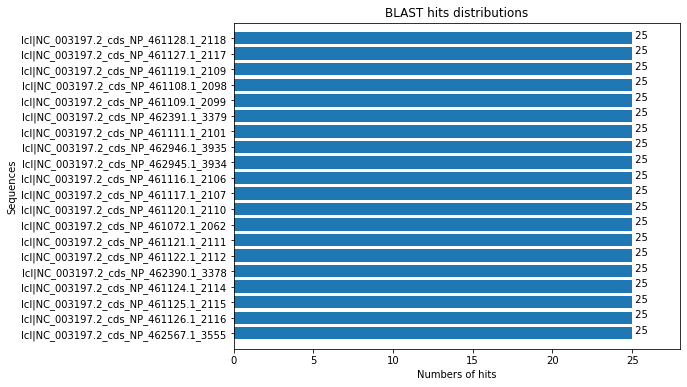

In [11]:
#Sortting and adjusting datas
hits.sort_values(inplace=True)
hits.reset_index(drop=True)

#Creating the graph
plt.barh(hits.index, hits.values)
plt.ylim([-1,len(hits.index)])
plt.xlim([0, hits[-1] + 3])

#Insert lables
for index, value in enumerate(hits.values):
    plt.text(value, index, " " + str(value))


plt.xlabel('Numbers of hits')
plt.ylabel('Sequences')
plt.title('BLAST hits distributions')

#Save and plot!
plt.savefig('Hits.png', bbox_inches = 'tight')

plt.show()
#plt.close()

## E-Value distribution

E-value analysis section.
This chart plots the distribution of E-values for all selected BLAST hits. It is useful to evaluate the success of the alignment for a given sequence database and help to adjust the E-Value cutoff in the annotation step.

In [13]:
#Series with e-value of subject sequenceid
evalues_series = df[["qseqid", "sseqid", "evalue"]].copy()

In [14]:
#Setting the figsize
plt.rcParams["figure.figsize"] = (5, 5)

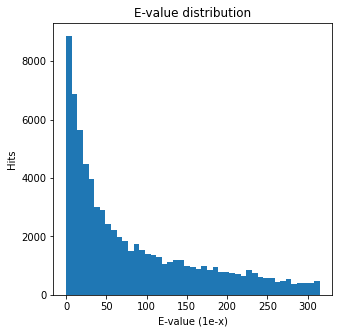

In [15]:
#Sorting by e-value
evalues_series.sort_values(["evalue"], axis=0, inplace=True, ascending=True)

#Adjusting the indexes
evalues_series.reset_index(drop=True, inplace=True)

#Creating a list of exponents of all evalue of dataframe
evalues = list(evalues_series.evalue)
evalues = [np.format_float_scientific(x, precision = 4, exp_digits=3) for x in evalues]
evalues_exp = [find_exp(float(x)) for x in evalues]

#Create the Histogram
plt.hist(evalues_exp, bins=[x for x in range(0, max(evalues_exp), max(evalues_exp)//40)])

#Set the labels
plt.xlabel('E-value (1e-x)')
plt.ylabel('Hits')
plt.title('E-value distribution')

#Plot and save!
plt.savefig('E-value_distribution.png', bbox_inches = 'tight')
plt.show()

## Bit-score distribution

Bit-score analysis section.

In [16]:
#Series with bit-score of subject sequenceid
bitscores = df[["qseqid", "sseqid", "bitscore"]].copy()

In [17]:
#Setting the figsize
plt.rcParams["figure.figsize"] = (5, 5)

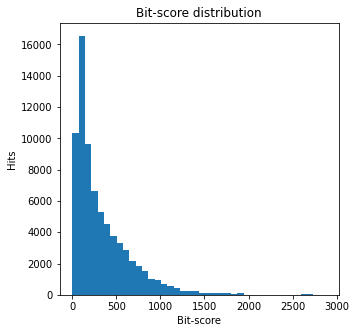

In [18]:
#Sorting by bit-score
bitscores.sort_values(["bitscore"], axis=0, inplace=True, ascending=True)

#Adjusting the indexes
bitscores.reset_index(drop=True, inplace=True)

#Create the histogram
plt.hist(bitscores.bitscore, bins=[x for x in range(0, int(max(bitscores.bitscore)), int(max(bitscores.bitscore))//40)])

#Adding some info labels
plt.xlabel('Bit-score')
plt.ylabel('Hits')
plt.title('Bit-score distribution')

#Save and plot!
plt.savefig('Bit-score_distribution.png', bbox_inches = 'tight')
plt.show()

## Length and Similarity distribution

Length and similarity analysis section.

### Length distribution

This chart displays the distribution of all calculated sequence lengths, shows the overall performance of the alignments and helps to adjust the annotation score in the annotation step.

In [19]:
#Series with length of subject sequenceid
length = df[["qseqid", "sseqid", "length"]].copy()

In [20]:
#Setting the figsize
plt.rcParams["figure.figsize"] = (5, 5)

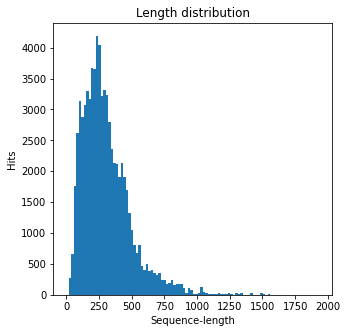

In [21]:
#Sorting by length
length.sort_values(["length"], axis=0, inplace=True, ascending=True)

#Adjusting the indexes
length.reset_index(drop=True, inplace=True)

#Create the histogram
plt.hist(length.length, bins=[x for x in range(0, int(max(length.length)), int(max(length.length))//100)])

#Insert info lables
plt.xlabel('Sequence-length')
plt.ylabel('Hits')
plt.title('Length distribution')

#Save and Plot!
plt.savefig('Length_distribution.png', bbox_inches = 'tight')
plt.show()

### Similarity distribution

This chart displays the distribution of all calculated sequence similarities (percentages), shows the overall performance of the alignments and helps to adjust the annotation score in the annotation step.

In [22]:
pidents = df[["qseqid", "pident"]].copy()

In [23]:
#Setting the figsize
plt.rcParams["figure.figsize"] = (5, 5)

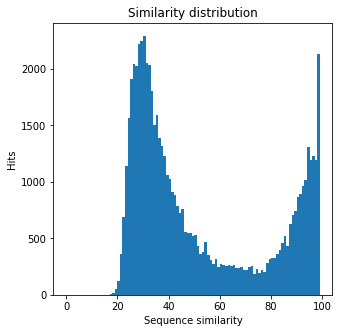

In [24]:
#Sorting by pident
pidents.sort_values(["pident"], axis=0, inplace=True, ascending=True)

#Adjusting the indexes
pidents.reset_index(drop=True, inplace=True)

#Create the histogram
plt.hist(pidents.pident, bins=[x for x in range(0, int(max(pidents.pident)), int(max(pidents.pident))//100)])

#Insert info lables
plt.xlabel('Sequence similarity')
plt.ylabel('Hits')
plt.title('Similarity distribution')

#Save and Plot!
plt.savefig('Length_distribution.png', bbox_inches = 'tight')
plt.show()

## Hits percentage

Sequences hit percentage.

In [25]:
pidents

,qseqid,pident
0,lcl|NC_003197.2_cds_NP_463383.1_4373,17.7
1,lcl|NC_003197.2_cds_NP_460929.1_1919,17.8
2,lcl|NC_003197.2_cds_NP_463124.1_4113,17.9
3,lcl|NC_003197.2_cds_NP_463124.1_4113,17.9
4,lcl|NC_003197.2_cds_NP_461455.1_2445,17.9
...,...,...
73812,lcl|NC_003197.2_cds_NP_462205.1_3193,100.0
73813,lcl|NC_003197.2_cds_NP_462205.1_3193,100.0
73814,lcl|NC_003197.2_cds_NP_462205.1_3193,100.0
73815,lcl|NC_003197.2_cds_NP_462207.1_3195,100.0


In [26]:
max(df["length"])

1953

In [27]:
df[df.bitscore == 2919.0]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
73805,lcl|NC_003277.2_cds_NP_490592.1_4546,sp|P22706|TRAI2_ECOLX,86.8,1756,227,2,1,5256,1,1756,0.0,2919.0


In [29]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.7 MB/s eta 0:00:00


In [30]:
from Bio import Entrez
Entrez.email = "Your.Name.Here@example.org"
handle = Entrez.efetch(db="protein", id="Q57TQ4", rettype="gb", retmode="text")
print(handle.read())

LOCUS       LPT_SALCH                 21 aa            linear   BCT 25-MAY-2022
DEFINITION  RecName: Full=thr operon leader peptide; AltName: Full=thr operon
            attenuator.
ACCESSION   Q57TQ4
VERSION     Q57TQ4.1
DBSOURCE    UniProtKB: locus LPT_SALCH, accession Q57TQ4;
            class: standard.
            created: Dec 4, 2007.
            sequence updated: May 10, 2005.
            annotation updated: May 25, 2022.
            xrefs: AE017220.1, AAX63907.1, WP_001575544.1
            xrefs (non-sequence databases): AlphaFoldDB:Q57TQ4,
            EnsemblBacteria:AAX63907, EnsemblBacteria:AAX63907,
            EnsemblBacteria:SCH_0001, KEGG:sec:SCH_0001,
            HOGENOM:CLU_221491_0_1_6, Proteomes:UP000000538, GO:0009088,
            GO:0031556, HAMAP:MF_01907, InterPro:IPR011720, Pfam:PF08254,
            TIGRFAMs:TIGR02077
KEYWORDS    Amino-acid biosynthesis; Leader peptide; Threonine biosynthesis.
SOURCE      Salmonella enterica subsp. enterica serovar Choleraesuis 